In [1]:
#dependencies
import pandas as pd
import numpy as np

#installations
# !pip install -U textblob 
# !python -m textblob.download_corpora

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#NLP imports
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# climate change tweet polarity

In [2]:
#import tweets csv
tweets_df = pd.read_csv ('climate_change_tweets.csv')
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [3]:
#remove unnecessary columns
clean_df = tweets_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]
clean_df

,date,username,tweet,language,retweets_count,likes_count
0,2020-10-20,senkamalaharris,Voting rights Workers’ rights Consumer rights ...,en,1603,7887
1,2020-10-20,senkamalaharris,Climate change has primed California for longe...,en,1133,7368
2,2020-10-20,watrdi,🚨🚨🚨🚨Rule Changes for Rep🚨🚨🚨🚨 Foreign Policy ...,en,204,95
3,2020-10-20,rbreich,Your reminder that Amy Coney Barrett thinks cl...,en,642,1814
4,2020-10-20,prageru,Endangered eagles are being killed at enormous...,en,318,631
...,...,...,...,...,...,...
34370,2014-01-05,dantgilbert,Conservatives deny science on climate change &...,en,272,138
34371,2014-01-04,sarcasticrover,Reminder; Just because it might be cold where ...,en,383,194
34372,2014-01-03,lolgop,Reminder: One snow storm disproves climate cha...,en,272,144
34373,2014-01-03,james_bg,Won't convince those who don't want to be conv...,en,208,50


In [4]:
#import textblob, output sentiment; polarity range of -1 (negative) to 1 (positive)
from textblob import TextBlob, Word, Blobber

clean_df['tweet'][:5].apply(lambda x: TextBlob(x).sentiment[0])

0    0.000000
1   -0.166667
2   -0.041667
3    0.100000
4   -0.042857
Name: tweet, dtype: float64

In [5]:
#add sentiment output to df
clean_df['sentiment'] = clean_df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
clean_df

#honestly, results are interesting but not telling of the users' opinion on climate change; rather indicates users' tone instead

,date,username,tweet,language,retweets_count,likes_count,sentiment
0,2020-10-20,senkamalaharris,Voting rights Workers’ rights Consumer rights ...,en,1603,7887,0.000000
1,2020-10-20,senkamalaharris,Climate change has primed California for longe...,en,1133,7368,-0.166667
2,2020-10-20,watrdi,🚨🚨🚨🚨Rule Changes for Rep🚨🚨🚨🚨 Foreign Policy ...,en,204,95,-0.041667
3,2020-10-20,rbreich,Your reminder that Amy Coney Barrett thinks cl...,en,642,1814,0.100000
4,2020-10-20,prageru,Endangered eagles are being killed at enormous...,en,318,631,-0.042857
...,...,...,...,...,...,...,...
34370,2014-01-05,dantgilbert,Conservatives deny science on climate change &...,en,272,138,0.000000
34371,2014-01-04,sarcasticrover,Reminder; Just because it might be cold where ...,en,383,194,-0.319034
34372,2014-01-03,lolgop,Reminder: One snow storm disproves climate cha...,en,272,144,0.000000
34373,2014-01-03,james_bg,Won't convince those who don't want to be conv...,en,208,50,0.300000


# #climatechangeisahoax vs. #climatechangeisreal

In [6]:
#import csvs, clean columns
hoax_df = pd.read_csv ('climate_change_hoax_tweets.csv')
real_df = pd.read_csv ('climate_change_is_real_tweets.csv')

clean_hoax_df = hoax_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]
clean_real_df = real_df[['date', 'username', 'tweet', 'language', 'retweets_count', 'likes_count']]

clean_real_df

,date,username,tweet,language,retweets_count,likes_count
0,2020-10-19,joancbaez,"Stand with science and medical professionals, ...",en,1004,5853
1,2020-10-14,epwdems,Watch as Judge Barrett doubles down on her ref...,en,376,883
2,2020-10-13,twittblaster,I took a walk in the woods and came out taller...,en,293,621
3,2020-09-14,wadecrowfoot,It actually won’t get cooler Mr. President. #C...,en,728,2283
4,2020-09-12,katyperry,VOTE like the air you breathe depends on it #c...,en,1040,10518
...,...,...,...,...,...,...
234,2015-04-22,richardbranson,#ClimateChangeIsReal #ClimateAction #EarthDay2...,und,313,306
235,2015-04-22,meatfreemonday,"#ClimateChangeIsReal, and eating less meat is ...",en,223,282
236,2015-04-22,unilever,#ClimateChangeIsReal. And businesses can grow ...,en,377,436
237,2015-04-15,is_foundation,Green jobs! Green planet! Green future! Let’s ...,en,836,2077


## ngrams detection

In [7]:
#TF-IDF vectorizer imports
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

#find ngrams
vect = TfidfVectorizer(ngram_range=(2,5), stop_words='english')

#combine tweets into one string
summaries = "".join(clean_hoax_df['tweet'])

#output ngrams summaries w/ counter to find most common words/phrases in each hashtag
ngrams_summaries = vect.build_analyzer()(summaries)
hoax_ngrams = Counter(ngrams_summaries).most_common(20)

hoax_ngrams

[('change hoax', 66),
 ('climate change', 64),
 ('climate change hoax', 58),
 ('climatechangehoax https', 14),
 ('human activity', 10),
 ('global temperatures', 9),
 ('hoax collapses', 8),
 ('collapses new', 8),
 ('new science', 8),
 ('science finds', 8),
 ('finds human', 8),
 ('activity virtually', 8),
 ('virtually zero', 8),
 ('zero impact', 8),
 ('impact global', 8),
 ('hoax https', 8),
 ('change hoax collapses', 8),
 ('hoax collapses new', 8),
 ('collapses new science', 8),
 ('new science finds', 8)]

In [8]:
#repeat for other hashtag
summaries = "".join(clean_real_df['tweet'])

ngrams_summaries = vect.build_analyzer()(summaries)
real_ngrams = Counter(ngrams_summaries).most_common(20)

real_ngrams

[('climatechangeisreal https', 76),
 ('climate change', 23),
 ('climatechangeisreal http', 9),
 ('parisagreement climatechangeisreal', 7),
 ('parisagreement climatechangeisreal https', 6),
 ('climatechangeisreal climateaction', 5),
 ('climatechange climatechangeisreal', 5),
 ('climate emergency', 4),
 ('climatechangeisreal climateactionnow', 4),
 ('gt gt', 4),
 ('mother earth', 4),
 ('paris accord', 4),
 ('climate crisis', 3),
 ('climateaction climatechangeisreal', 3),
 ('world leaders', 3),
 ('coast texas', 3),
 ('year old', 3),
 ('climatechangeisreal alexandriav2005', 3),
 ('climatechangeisreal globalwarming', 3),
 ('sea ice', 3)]

## deep learning to output new tweets
https://medium.com/@nikkisharma536/what-will-elon-musk-tweet-next-generating-tweets-with-deep-learning-acddfbf42ed6

In [11]:
# !pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install fastai==1.0.61

#import fastAI; may need to use above pip installs (**very** time consuming)
from fastai.text import *

#create 'databunch' for fastAI to tokenize
hoax_data = (text.data.TextList.from_df(clean_hoax_df, cols='tweet')\
        .random_split_by_pct(0.1)\
        .label_for_lm()\
        .databunch(bs=48))

hoax_data.show_batch()

idx,text
0,. xxmaj trump is doing xxunk . xxmaj xxunk xxunk & & xxunk xxunk by the xxup xxunk xxunk is xxunk . xxmaj but xxunk money to xxunk a climate change hoax has zero to do with the xxunk crisis . xxmaj so off to your xxunk xxunk & & let xxup xxunk do the xxunk xxunk https : / / t.co / xxunk xxbos xxrep 4 xxunk xxmaj xxunk
1,# xxunk https : / / t.co / xxunk xxbos xxmaj the xxunk xxunk # xxunk and his xxunk xxunk are xxunk about # xxunk # climatechangehoax # xxunk # xxunk # xxmaj xxunk xxmaj this is their xxunk xxunk xxrep 4 . xxbos xxmaj when all xxunk xxunk ... xxmaj democrats xxunk to the “ xxmaj climate xxmaj change ” xxunk xxunk xxunk xxunk xxunk xxmaj democrats have been
2,"xxunk / xxunk xxmaj xxunk — hoax xxmaj russian xxmaj xxunk / collusion — hoax xxmaj xxunk xxmaj xxunk — hoax xxmaj xxunk xxmaj xxunk xxunk xxunk — hoax xxmaj impeachment — hoax xxup xxunk — xxmaj xxunk hoax xxmaj xxunk ’s xxunk ’s on xxup us xxunk — hoax xxmaj trump ’s xxunk “ hoax ” xxunk xxunk xxunk xxmaj who ’s the real hoax ? xxbos xxunk ,"
3,hoax ! * xxmaj xxunk xxunk . xxmaj hoax ! * xxunk xxunk xxunk xxunk of xxunk xxunk . xxmaj hoax ! * xxmaj friends with xxmaj xxunk xxmaj xxunk . xxmaj hoax ! * xxmaj climate xxmaj change . xxmaj hoax ! * xxmaj xxunk xxmaj xxunk xxunk . xxmaj hoax ! * xxmaj xxunk xxunk . xxmaj hoax ! * xxmaj impeachment . xxmaj hoax ! * xxmaj
4,"xxmaj xxunk xxunk ... # climatechangehoax # xxup maga # xxunk # xxunk # xxunk # xxunk # xxunk https : / / t.co / xxunk xxbos 2 xxunk xxunk to xxmaj xxunk xxmaj xxunk : xxmaj xxunk on the xxunk . xxmaj the xxunk the more the xxunk . xxmaj the xxunk will be xxunk it , if only to xxunk xxunk the xxunk of the xxunk / climate"


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,4.455063,3.860737,0.344941,00:09


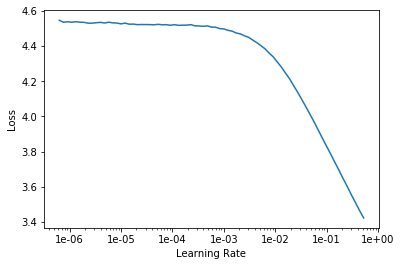

In [25]:
#create a deep learning model w/ fastAI
learn = language_model_learner (hoax_data, AWD_LSTM, drop_mult=0.3, model_dir = '/tweetmodels')

#find the appropriate learning rate
learn.lr_find()

#find the point where the slope is steepest
learn.recorder.plot (skip_end=15)

#fit the model based on selected learning rate
learn.fit_one_cycle (1, 1e-1, moms=(0.8, 0.7))

In [24]:
#begin predicting tweets starting from some n_words found before
N_WORDS = 25

print (learn.predict ("Hoax", N_WORDS, temperature = 0.75))
print (learn.predict ("Science", N_WORDS, temperature = 0.75))
print (learn.predict ("Trump is", N_WORDS, temperature = 0.75))
print (learn.predict ("Zero impact", N_WORDS, temperature = 0.75))

Hoax ( The New Face ) and " If You Got It " ( The New
Science Is In You = = While You Are Not There is a science - science - science
Trump is a New World Now - Trump - House - House House House Trump house in
Zero impact the Earth on Earth ( EARTH ) = = . The EARTH , the Earth and the Earth
